# Criação de modelos de classificação

## Preparação dos dados

### Codificação das features categóricas

In [40]:
import pandas as pd

df = pd.read_csv('dados_estudantes.csv')
df.head()

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


In [41]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Migração', 'Sexo','Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',
                       'Taxas de matrícula em dia', 'Bolsista', 'Período','Estado civil', 'Curso', 'Qualificação prévia']

encoder = OneHotEncoder(drop='if_binary')

df_categorical = df[categorical_cols]
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical).toarray(), 
                          columns=encoder.get_feature_names_out(categorical_cols))
df_final = pd.concat([df.drop(categorical_cols, axis=1), df_encoded], axis=1)
df_final.head()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_final.columns

Index(['Idade na matrícula', 'Taxa de desemprego', 'Taxa de inflação', 'PIB',
       'disciplinas 1º semestre (creditadas)',
       'disciplinas 1º semestre (matriculadas)',
       'disciplinas 1º semestre (avaliações)',
       'disciplinas 1º semestre (aprovadas)',
       'disciplinas 1º semestre (notas)',
       'disciplinas 1º semestre (sem avaliações)',
       'disciplinas 2º semestre (creditadas)',
       'disciplinas 2º semestre (matriculadas)',
       'disciplinas 2º semestre (avaliações)',
       'disciplinas 2º semestre (aprovadas)',
       'disciplinas 2º semestre (notas)',
       'disciplinas 2º semestre (sem avaliações)', 'Target', 'Migração_Sim',
       'Sexo_Masculino', 'Estrangeiro_Sim',
       'Necessidades educacionais especiais_Sim', 'Devedor_Sim',
       'Taxas de matrícula em dia_Sim', 'Bolsista_Sim', 'Período_Noturno',
       'Estado civil_Casado', 'Estado civil_Divorciado',
       'Estado civil_Legalmente Separado', 'Estado civil_Solteiro',
       'Estado civil_Un

### Separação dos dados

In [43]:
X = df_final.drop('Target', axis=1)
y = df_final.Target

In [44]:
X.head()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
y.value_counts()

Graduado       2209
Desistente     1421
Matriculado     794
Name: Target, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=0)

## Modelagem com RandomForest

Modelo com valores default:

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

print(f'Acurácia do treino: {rf.score(X_train, y_train)}')
print(f'Acurácia da validação: {rf.score(X_val, y_val)}')

Acurácia do treino: 0.9975177304964539
Acurácia da validação: 0.7680851063829788


Modificando alguns hiperparâmetros:

In [48]:
rf = RandomForestClassifier(random_state=0, max_depth=10)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

print(f'Acurácia do treino: {rf.score(X_train, y_train)}')
print(f'Acurácia da validação: {rf.score(X_val, y_val)}')

Acurácia do treino: 0.898936170212766
Acurácia da validação: 0.7734042553191489


---

### Desafio

Agora é o momento de aprofundar seu conhecimento e explorar outro classificador, a fim de avaliar como os resultados podem variar com essa abordagem diferente. Na documentação do sckit-learn temos temos diversas opções e vamos recomendar algumas delas aqui:

- tree.DecisionTreeClassifier

- tree.ExtraTreeClassifier

- neighbors.KNeighborsClassifier

- linear_model.LogisticRegression (setting multi_class=”multinomial”)

- linear_model.RidgeClassifier

- ensemble.GradientBoostingClassifier

Vou usar o KNeighborsClassifier para fugir um pouco dos modelos baseados em árvore. Como esse é um algoritmo que usa distâncias para tomar as decisões, primeiro vou normalizar os valores. Também vou aproveitar para codificar o target.

In [49]:
X_train.head()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
1706,18,12.7,3.7,-1.70,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1399,19,16.2,0.3,-0.92,0,7,7,7,14.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3643,19,10.8,1.4,1.74,0,5,6,4,12.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3369,18,7.6,2.6,0.32,0,6,9,4,11.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4171,18,7.6,2.6,0.32,0,6,14,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# use train dataset to fit normalization (avoid data leakage)
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
X_train_norm = normalize.fit_transform(X_train)
pd.DataFrame(X_train_norm).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.022222,0.593023,1.000000,0.311757,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.044444,1.000000,0.244444,0.414795,0.0,0.269231,0.155556,0.269231,0.801587,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.044444,0.372093,0.488889,0.766182,0.0,0.192308,0.133333,0.153846,0.666667,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.022222,0.000000,0.755556,0.578600,0.0,0.230769,0.200000,0.153846,0.611111,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.022222,0.000000,0.755556,0.578600,0.0,0.230769,0.311111,0.000000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# normalizing validation dataset with the already trained normalizer
X_val_norm = normalize.transform(X_val)
pd.DataFrame(X_val_norm).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.355556,0.209302,0.000000,0.124174,0.0,0.230769,0.155556,0.230769,0.611111,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.044444,0.732558,0.111111,0.640687,0.0,0.230769,0.133333,0.230769,0.722222,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.044444,0.372093,0.488889,0.766182,0.3,0.461538,0.266667,0.423077,0.727273,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.044444,0.209302,0.000000,0.124174,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.918605,0.800000,0.000000,0.0,0.269231,0.200000,0.269231,0.764506,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Encoding target variable
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()
y_train_encoded = lbl_enc.fit_transform(y_train)
y_val_encoded = lbl_enc.transform(y_val)

In [53]:
# Training and checking model's score
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_train_norm, y_train_encoded)
print('Algoritmo KNeighborsClassifier:')
print(f'Acurácia do treino: {neigh.score(X_train_norm, y_train_encoded)}')
print(f'Acurácia da validação: {neigh.score(X_val_norm, y_val_encoded)}')

Algoritmo KNeighborsClassifier:
Acurácia do treino: 0.7606382978723404
Acurácia da validação: 0.674468085106383


#### Gabarito com GradientBoostingClassifier

O GradientBoostingClassifier é um algoritmo de aprendizado de máquina amplamente utilizado para tarefas de classificação. Ele faz parte da família de algoritmos de impulso (boosting) e é conhecido por sua capacidade de melhorar gradualmente o desempenho do modelo, combinando várias árvores de decisão fracas em um modelo mais robusto e preciso.

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_val)
print(f'Acurácia de treino: {gbc.score(X_train, y_train)}')
print(f'Acurácia de validação: {gbc.score(X_val, y_val)}')


Acurácia de treino: 0.8411347517730496
Acurácia de validação: 0.7691489361702127


#### Resultados obtidos

**RandomForest**

Acurácia do treino: 0.898936170212766

Acurácia da validação: 0.7734042553191489

**KNeighbors**

Acurácia do treino: 0.7606382978723404

Acurácia da validação: 0.674468085106383

**GradientBoosting**

Acurácia de treino: 0.8411347517730496

Acurácia de validação: 0.7691489361702127

---

### Matriz de confusão multiclasse

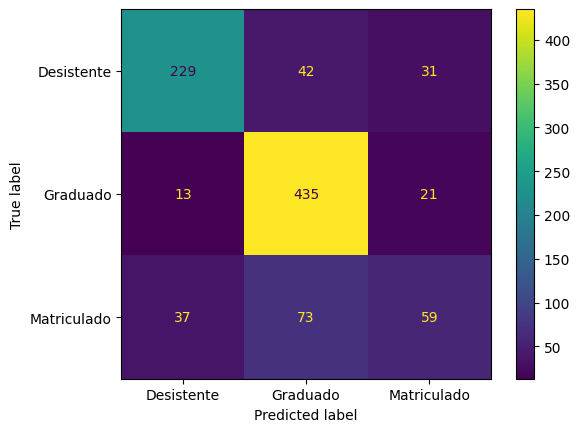

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val, y_pred);

Ao invés de ver os totais em cada elemento da matriz, podemos ver a proporção, usando `normalize`. Também podemos utilizar outros esquemas de cores com `cmap`.

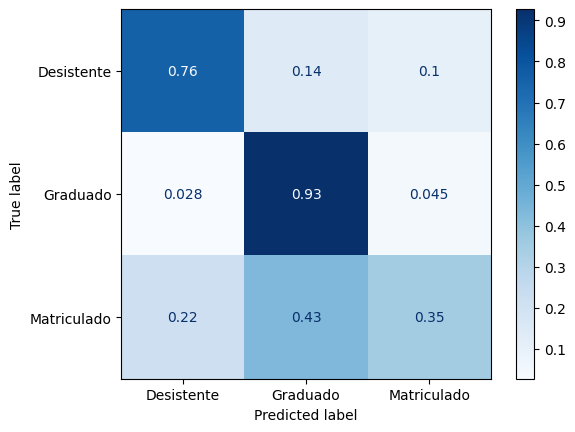

In [56]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

#### Dúvida postada no fórum

**Minha pergunta:** 

Quando a matriz de confusão é maior do que 2x2, como eu identifico onde ficam os falsos positivos e falsos negativos? Pensando em uma matriz 3x3, como a da aula, em que as linhas são os valores reais e as colunas o valores previstos, os falsos positivos seriam todos os valores acima da diagonal principal, e os falsos negativos seriam todos os valores abaixo da diagonal principal? Posso sempre generalizar dessa forma?

**Resposta:**

Indicaram um exemplo [deste artigo](https://www.mdpi.com/2504-2289/7/1/15) e meio que traduziram o que havia lá. Olhando para a imagem (que está com os eixos trocados quando comparado com a matriz de confusão que geramos), para calcular os valores da Classe 1, por exemplo, note que:

![matriz de confusão 3x3](https://cdn1.gnarususercontent.com.br/1/815643/66344dd9-ee5a-4368-87f2-0dac7a59dd94.png)

- TP (True positive) é o valor da previsão correta.

- Os TN (True negative) são os quadrantes que não envolvem a Classe 1 (o que está fora do cruzamento da classe 1 em True e Predicted).

- Os FP (False positive) são as classes erroneamente previstas como Classe 1,

- Os FN (False negative) são as classes previstas como outras classes, mas que deveriam ter sido previstas como 
Classe 1.

O que eu entendi foi: no caso de problemas multiclasse, TP, TN, FP e FN vão ser **baseadas na classe que eu indicar como positiva**. Ou seja, ao olhar para a Classe 2 da imagem, TP, TN, FP e FN seriam diferentes, e o mesmo aconteceria para a Classe 3. E aí, caso eu quisesse o valor geral para a matriz de confusão, eu faria a média do que eu obtive em cada métrica para cada classe.

### Analisando outras métricas

In [57]:
from sklearn.metrics import classification_report

report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

  Desistente       0.82      0.76      0.79       302
    Graduado       0.79      0.93      0.85       469
 Matriculado       0.53      0.35      0.42       169

    accuracy                           0.77       940
   macro avg       0.71      0.68      0.69       940
weighted avg       0.75      0.77      0.76       940



## Oversampling

In [58]:
y_train.value_counts(normalize=True)*100

Graduado       49.929078
Desistente     32.127660
Matriculado    17.943262
Name: Target, dtype: float64

In [59]:
from imblearn.over_sampling import SMOTE

oversampler = SMOTE(random_state=0)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

In [60]:
y_train_balanced.value_counts(normalize=True)*100

Desistente     33.333333
Graduado       33.333333
Matriculado    33.333333
Name: Target, dtype: float64

In [61]:
rf_balanced = RandomForestClassifier(max_depth=10, random_state=0)
rf_balanced.fit(X_train_balanced, y_train_balanced)
y_pred = rf_balanced.predict(X_val)
rf_balanced.score(X_val, y_val)

0.752127659574468

              precision    recall  f1-score   support

  Desistente       0.84      0.72      0.77       302
    Graduado       0.80      0.86      0.83       469
 Matriculado       0.48      0.51      0.49       169

    accuracy                           0.75       940
   macro avg       0.71      0.70      0.70       940
weighted avg       0.76      0.75      0.75       940



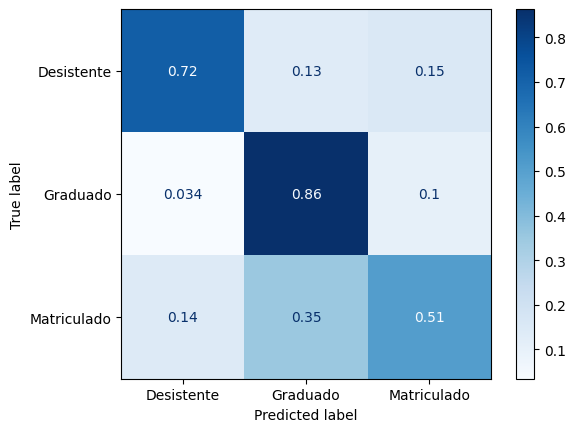

In [62]:
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

---

### Desafio

O desafio agora consiste em balancear os dados e utilizar o mesmo algoritmo que você usou no desafio anterior para treinar o modelo. Após o treinamento com os dados balanceados, será necessário gerar a matriz de confusão e obter o relatório de métricas de desempenho. Em seguida, será fundamental comparar esses resultados com os dados que foram apresentados durante a aula.

#### KNeighborsClassifier

In [63]:
# normalizing the balanced dataset
normalize = MinMaxScaler()
X_train_bal_norm = normalize.fit_transform(X_train_balanced)
X_val_norm = normalize.transform(X_val)

# encoding the balanced target variable
lbl_enc = LabelEncoder()
y_train_bal_encoded = lbl_enc.fit_transform(y_train_balanced)
y_val_encoded = lbl_enc.transform(y_val)

# Training and evaluating the model
neigh = KNeighborsClassifier()
neigh.fit(X_train_bal_norm, y_train_bal_encoded)
y_pred = neigh.predict(X_val_norm)

Algoritmo KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       302
           1       0.72      0.75      0.74       469
           2       0.34      0.37      0.35       169

    accuracy                           0.63       940
   macro avg       0.58      0.57      0.57       940
weighted avg       0.64      0.63      0.63       940



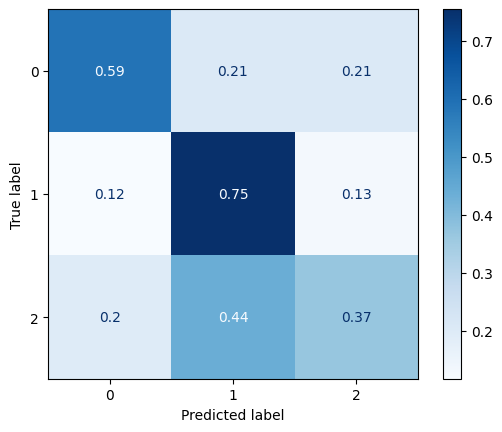

In [64]:
print('Algoritmo KNeighborsClassifier:')
print(classification_report(y_val_encoded, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val_encoded, y_pred, normalize='true', cmap='Blues');

#### GradientBoostClassifier

In [65]:
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train_balanced, y_train_balanced)
y_pred = gbc.predict(X_val)

              precision    recall  f1-score   support

  Desistente       0.82      0.74      0.78       302
    Graduado       0.81      0.89      0.85       469
 Matriculado       0.51      0.47      0.49       169

    accuracy                           0.77       940
   macro avg       0.72      0.70      0.71       940
weighted avg       0.76      0.77      0.76       940



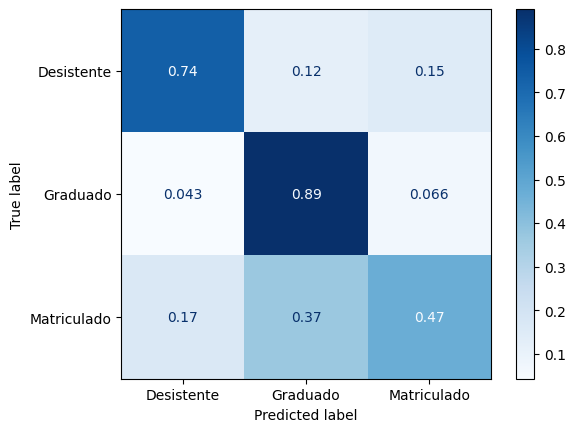

In [66]:
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, cmap='Blues', normalize='true');

---

## Validação cruzada e pipeline

In [67]:
from imblearn.pipeline import Pipeline as imbpipeline

model = RandomForestClassifier(max_depth=10, random_state=0)
model_pipeline = imbpipeline([
    ('oversample', SMOTE()),
    ('random_forest', model)
])

In [68]:
from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_results = cross_validate(model_pipeline, X, y, cv=skf, scoring=['recall_weighted'])
cv_results

{'fit_time': array([0.60163975, 0.55334282, 0.56041503, 0.56683779, 0.58004761]),
 'score_time': array([0.02228498, 0.01761532, 0.01762962, 0.01893687, 0.01696301]),
 'test_recall_weighted': array([0.7712766 , 0.74069149, 0.74601064, 0.76728723, 0.75797872])}

In [69]:
mean_results = cv_results['test_recall_weighted'].mean()
std_results = cv_results['test_recall_weighted'].std()

print(f'Intervalo de confiança (recall ponderado): [{mean_results-2*std_results}, {min(1, mean_results+2*std_results)}]')

Intervalo de confiança (recall ponderado): [0.7330400627434338, 0.7802578095969915]


## Avaliação do modelo com dados de teste

In [70]:
oversampler = SMOTE(random_state=0)
X_balanced, y_balanced = oversampler.fit_resample(X, y)
chosen_model = RandomForestClassifier(max_depth=10, random_state=0)
chosen_model.fit(X_balanced, y_balanced)

RandomForestClassifier(max_depth=10, random_state=0)

In [71]:
y_pred = chosen_model.predict(X_test)

              precision    recall  f1-score   support

  Desistente       0.86      0.74      0.80       213
    Graduado       0.82      0.85      0.83       332
 Matriculado       0.49      0.56      0.52       119

    accuracy                           0.76       664
   macro avg       0.72      0.72      0.72       664
weighted avg       0.77      0.76      0.77       664



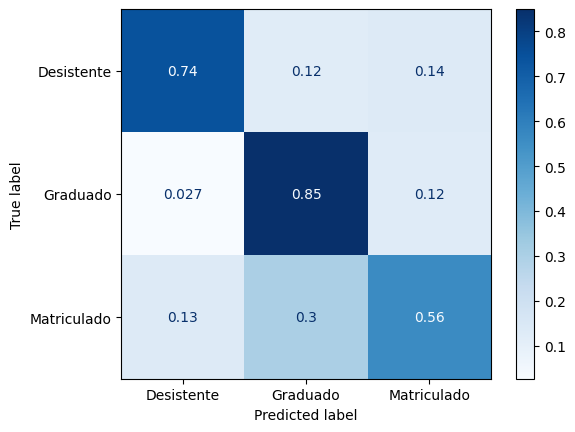

In [72]:
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', normalize='true');